# 오차행렬로 모델 평가

- 훈련데이터의 정확도와 테스트데이터의 정확도가 높아야 하고 차이가 적을수록 좋은 모델이다.(일반화 가능성이 높은 결과)

- 실제와 예측이 얼마나 일치하는가라는 관점이 모델의 성능을 평가할때 가장 중요함

> 평가할때 오차행렬(confusion matrix) 사용함 

1. 0을 0으로 1을 1로 예측하는 정확도가 중요함 

2. 오차 행렬 평가지표




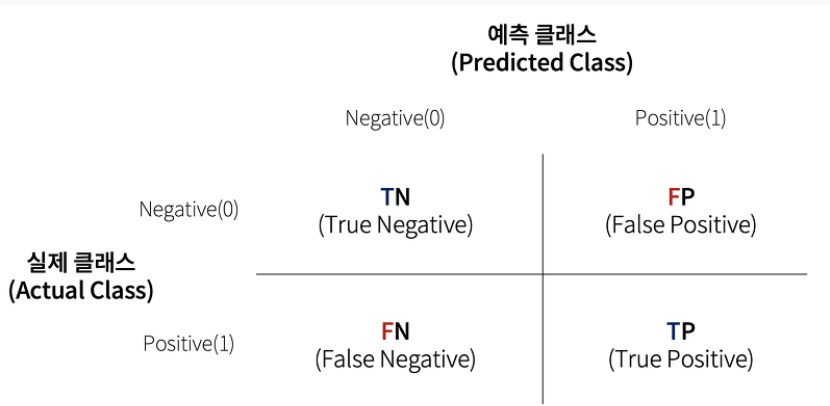

오차 행렬은 위와 같이 4분면 행렬에서 실제 label class과 예측 label class가 어떠한 유형을 가지고 mapping 되는지 나타낸다. 4분면의 왼쪽과 오른쪽은 에측된 class를 기준으로 Negative와 Positive로 분류하고, 위와 아래는 실제 class를 기준으로 Negative와 Positive로 분류한다. 따라서 예측 class와 실제 class에 따라 TN, FP, FN, TP 형태로 오차 행렬의 4분면을 채울 수 있다.

1. TN은 예측값을 Negative 값인 0으로 예측했고 실제값 또한 Negative 값인 0일 때

2. FP은 예측값을 Positive 값인 1으로 예측했는데 실제값은 Negative 값인 0일 때

3. FN은 예측값을 Negative 값인 0으로 예측했는데 실제값은 Positive 값인 1일 때

4. TP은 예측값을 Positive 값인 1으로 예측했고 실제값 또한 Positive 값인 1일 때

> 정밀도(precision) = TP/(TP+FP)

> 재현율(recall) = TP/(TP+FN)

> F-score = 2/ ((1/정밀도) + (1/재현율))

# 실습

In [3]:
data<-read.csv("data/Fvote.csv", header=TRUE)
data<-data[ , 2:15]
data

gender.male,gender.female,region.Sudo,region.Chungcheung,region.Honam,region.Youngnam,region.Others,edu,income,age,score_gov,score_progress,score_intention,vote
1,0,0,0,0,1,0,1.0,0.6666667,0.6666667,0.25,0.25,0.75,1
1,0,0,0,0,0,1,0.5,0.6666667,0.6666667,0.25,0.75,0.50,0
1,0,0,0,1,0,0,0.0,0.3333333,1.0000000,0.00,0.50,0.45,1
0,1,1,0,0,0,0,0.5,0.0000000,0.6666667,1.00,0.75,0.40,1
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.75,0.50,0.35,1
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.00,0.75,0.70,1
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.75,0.75,0.25,1
1,0,0,0,0,0,1,0.5,1.0000000,1.0000000,0.50,0.75,0.65,1
1,0,0,1,0,0,0,0.0,0.3333333,1.0000000,0.25,0.25,0.25,0
1,0,1,0,0,0,0,0.0,0.3333333,0.6666667,0.75,0.25,0.50,1


In [4]:
data$vote<-factor(data$vote, labels=c("no", "yes"))
head(data)

gender.male,gender.female,region.Sudo,region.Chungcheung,region.Honam,region.Youngnam,region.Others,edu,income,age,score_gov,score_progress,score_intention,vote
1,0,0,0,0,1,0,1.0,0.6666667,0.6666667,0.25,0.25,0.75,yes
1,0,0,0,0,0,1,0.5,0.6666667,0.6666667,0.25,0.75,0.50,no
1,0,0,0,1,0,0,0.0,0.3333333,1.0000000,0.00,0.50,0.45,yes
0,1,1,0,0,0,0,0.5,0.0000000,0.6666667,1.00,0.75,0.40,yes
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.75,0.50,0.35,yes
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.00,0.75,0.70,yes


## train / test dataset 나누기


In [7]:
library(caret)


In [8]:
install.packages('lattice')


  There is a binary version available but the source version is later:
         binary  source needs_compilation
lattice 0.20-44 0.20-45              TRUE

  Binaries will be installed


Warning message:
"package 'lattice' is in use and will not be installed"

In [9]:
set.seed(42)
# vote를 종속변수로 두기 (투표를 했는지 안했는지 예측)
training.samples <- createDataPartition(data$vote, p = 0.7, list = FALSE)
training.samples

Resample1
1
2
3
4
5
6
7
11
12
15


In [10]:

train  <- data[training.samples, ]
test <- data[-training.samples, ]

In [11]:
finalControl <- trainControl(method = "none", classProbs = TRUE)
set.seed(42)
FinalModel <- train(vote ~ ., data = train, 
                    method = "knn", 
                    trControl = finalControl, 
                    tuneGrid = data.frame(k=8),
                    metric = "Accuracy")
FinalModel

k-Nearest Neighbors 

148 samples
 13 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: None 

## 모델 평가
### 훈련 모델의 예측 Class 측정(훈련데이터의 정확도)

In [12]:
train_pred<-predict(FinalModel, train)

In [13]:
# 오차행렬 적용
confusionMatrix(data = train_pred, reference = train$vote)
# 정확도 ->  Accuracy : 0.7635 

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  18  10
       yes 25  95
                                          
               Accuracy : 0.7635          
                 95% CI : (0.6868, 0.8294)
    No Information Rate : 0.7095          
    P-Value [Acc > NIR] : 0.08533         
                                          
                  Kappa : 0.3605          
                                          
 Mcnemar's Test P-Value : 0.01796         
                                          
            Sensitivity : 0.4186          
            Specificity : 0.9048          
         Pos Pred Value : 0.6429          
         Neg Pred Value : 0.7917          
             Prevalence : 0.2905          
         Detection Rate : 0.1216          
   Detection Prevalence : 0.1892          
      Balanced Accuracy : 0.6617          
                                          
       'Positive' Class : no              
                                 

In [14]:
confusionMatrix(data = train_pred, reference = train$vote, mode = "prec_recall")
# mode = "prec_recall" 설정하면 precision,recall 조회됨
# Precision : 0.6429          
# Recall : 0.4186 

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  18  10
       yes 25  95
                                          
               Accuracy : 0.7635          
                 95% CI : (0.6868, 0.8294)
    No Information Rate : 0.7095          
    P-Value [Acc > NIR] : 0.08533         
                                          
                  Kappa : 0.3605          
                                          
 Mcnemar's Test P-Value : 0.01796         
                                          
              Precision : 0.6429          
                 Recall : 0.4186          
                     F1 : 0.5070          
             Prevalence : 0.2905          
         Detection Rate : 0.1216          
   Detection Prevalence : 0.1892          
      Balanced Accuracy : 0.6617          
                                          
       'Positive' Class : no              
                                          

In [15]:
postResample(pred = train_pred, obs = train$vote)

Accuracy     Kappa 
0.7635135 0.3604938

### 테스트 모델의 예측 Class 측정


In [16]:
test_pred<-predict(FinalModel, test)

In [17]:
confusionMatrix(data = test_pred, reference = test$vote)


Confusion Matrix and Statistics

          Reference
Prediction no yes
       no   3  10
       yes 15  35
                                         
               Accuracy : 0.6032         
                 95% CI : (0.472, 0.7243)
    No Information Rate : 0.7143         
    P-Value [Acc > NIR] : 0.9793         
                                         
                  Kappa : -0.0606        
                                         
 Mcnemar's Test P-Value : 0.4237         
                                         
            Sensitivity : 0.16667        
            Specificity : 0.77778        
         Pos Pred Value : 0.23077        
         Neg Pred Value : 0.70000        
             Prevalence : 0.28571        
         Detection Rate : 0.04762        
   Detection Prevalence : 0.20635        
      Balanced Accuracy : 0.47222        
                                         
       'Positive' Class : no             
                                         

In [19]:
confusionMatrix(data = test_pred, reference = test$vote, mode = "prec_recall")


Confusion Matrix and Statistics

          Reference
Prediction no yes
       no   3  10
       yes 15  35
                                         
               Accuracy : 0.6032         
                 95% CI : (0.472, 0.7243)
    No Information Rate : 0.7143         
    P-Value [Acc > NIR] : 0.9793         
                                         
                  Kappa : -0.0606        
                                         
 Mcnemar's Test P-Value : 0.4237         
                                         
              Precision : 0.23077        
                 Recall : 0.16667        
                     F1 : 0.19355        
             Prevalence : 0.28571        
         Detection Rate : 0.04762        
   Detection Prevalence : 0.20635        
      Balanced Accuracy : 0.47222        
                                         
       'Positive' Class : no             
                                         

In [21]:
postResample(pred = test_pred, obs = test$vote)

Accuracy       Kappa 
 0.60317460 -0.06060606